Sources: [scikit-learn](http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#example-linear-model-plot-ols-py), [DrawMyData](http://robertgrantstats.co.uk/drawmydata.html).

The purpose of this tutorial is to give a brief introduction into the logic of statistical model building used in machine learning. If you want to read more about the theory behind this tutorial, check out [An Introduction To Statistical Learning](https://www.amazon.com/Introduction-Statistical-Learning-Applications-Statistics/dp/1461471370).

Let us get started.

## Preliminary

In [1]:
import pandas as pd
from sklearn import linear_model
import random
import numpy as np
%matplotlib inline

## Load Data

With those libraries added, let us load the dataset (the dataset is avaliable in his site's GitHub repo).

In [2]:
# Load the data
df = pd.read_csv('../data/simulated_data/battledeaths_n300_cor99.csv')

# Shuffle the data's rows (This is only necessary because of the way I created
# the data using DrawMyData. This would not normally be necessary with a real analysis).
df = df.sample(frac=1)

## Explore Data

Let us take a look at the first few rows of the data just to get an idea about it.

In [3]:
# View the first few rows
df.head()

,friendly_battledeaths,enemy_battledeaths
7,8.2051,9.6154
286,88.7179,86.1538
164,14.3590,8.8462
180,38.9744,36.5385
89,93.0769,93.0769


Now let us plot the data so we can see it's structure.

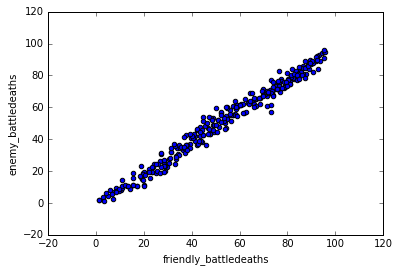

In [4]:
# Plot the two variables against eachother
df.plot(x='friendly_battledeaths', y='enemy_battledeaths', kind='scatter')

## Break Data Up Into Training And Test Datasets

Now for the real work. To judge how how good our model is, we need something to test it against. We can accomplish this using a technique called cross-validation. Cross-validation can get much more complicated and powerful, but in this example we are going do the most simple version of this technique.

### Steps

1. Divide the dataset into two datasets: A 'training' dataset that we will use to train our model and a 'test' dataset that we will use to judge the accuracy of that model.
2. Train the model on the 'training' data.
3. Apply that model to the test data's X variable, creating the model's guesses for the test data's Ys.
4. Compare how close the model's predictions for the test data's Ys were to the actual test data Ys.

In [5]:
# Create our predictor/independent variable
# and our response/dependent variable
X = df['friendly_battledeaths']
y = df['enemy_battledeaths']

# Create our test data from the first 30 observations
X_test = X[0:30].reshape(-1,1)
y_test = y[0:30]

# Create our training data from the remaining observations
X_train = X[30:].reshape(-1,1)
y_train = y[30:]

## Train The Linear Model

Let us train the model using our training data.

In [6]:
# Create an object that is an ols regression
ols = linear_model.LinearRegression()

In [7]:
# Train the model using our training data
model = ols.fit(X_train, y_train)

## View The Results

Here are some basic outputs of the model, notably the coefficient and the R-squared score.

In [8]:
# View the training model's coefficient
model.coef_

array([ 0.97696721])

In [9]:
# View the R-Squared score
model.score(X_test, y_test)

0.98573393818904709

Now that we have used the training data to train a model, called `model`, we can apply it to the test data's Xs to make predictions of the test data's Ys.

Previously we used `X_train` and `y_train` to train a linear regression model, which we stored as a variable called `model`. The code `model.predict(X_test)` applies the trained model to the `X_test` data, data the model has never seen before to make predicted values of Y.

This can easily be seen by simply running the code:

In [10]:
# Run the model on X_test and show the first five results
list(model.predict(X_test)[0:5])

[7.4633347104887342,
 86.121700007313791,
 13.475493202059415,
 37.523931774900845,
 90.380300060086256]

This array of values is the model's best guesses for the values of the test data's Ys. Compare them to the actual test data Y values:

In [11]:
# View the first five test Y values
list(y_test)[0:5]

[9.6153999999999993,
 86.153800000000004,
 8.8461999999999996,
 36.538499999999999,
 93.076899999999995]

The difference between the model's predicted values and the actual values is how is we judge as model's accuracy, because a perfectly accurate model would have residuals of zero.

However, to judge a model, we want a single statistic (number) that we can use as a measure. We want this measure to capture the difference between the predicted values and the actual values across all observations in the data.

The most common statistic used for quantitative Ys is the **residual sum of squares**:

$$ RSS = \sum\_{i=1}^{n}(y\_{i}-f(x\_{i}))^{2} $$

Don't let the mathematical notation throw you off:

 - $f(x\_{i})$ is the model we trained: `model.predict(X_test)`
 - $y\_{i}$ is the test data's y: `y_test`
 - $^{2}$ is the exponent: `**2`
 - $\sum\_{i=1}^{n}$ is the summation: `.sum()`
 
In the residual sum of squares, for each observation we find the difference between the model's predicted Y and the actual Y, then square that difference to make all the values positive. Then we add all those squared differences together to get a single number. The final result is a statistic representing how far the model's predictions were from the real values.

In [12]:
# Apply the model we created using the training data 
# to the test data, and calculate the RSS.
((y_test - model.predict(X_test)) **2).sum()

313.6087355571951

Note: You can also use Mean Squared Error, which is RSS divided by the degrees of freedom. But I find it helpful to think in terms of RSS.

In [13]:
# Calculate the MSE
np.mean((model.predict(X_test) - y_test) **2)

10.45362451857317